In [1]:
from skimage import color
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imgs = [
    'bright.webp',
    'dark.jpg',
    'highcont.jpg',
    'lowcont.jpg'
]

In [39]:
def display_color_histogram_equalization(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    r, g, b = cv2.split(img_rgb)
    
    r_eq = cv2.equalizeHist(r)
    g_eq = cv2.equalizeHist(g)
    b_eq = cv2.equalizeHist(b)
    
    img_eq = cv2.merge([r_eq, g_eq, b_eq])
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    axes[0, 0].imshow(img_rgb)
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(img_eq)
    axes[0, 1].set_title('Normalized Image')
    axes[0, 1].axis('off')
    
    axes[1, 0].hist(r.ravel(), bins=256, alpha=0.5, color='red', label='R')
    axes[1, 0].hist(g.ravel(), bins=256, alpha=0.5, color='green', label='G')
    axes[1, 0].hist(b.ravel(), bins=256, alpha=0.5, color='blue', label='B')
    axes[1, 0].set_title('Original RGB Histogram')
    axes[1, 0].legend()
    
    axes[1, 1].hist(r_eq.ravel(), bins=256, alpha=0.5, color='red', label='R')
    axes[1, 1].hist(g_eq.ravel(), bins=256, alpha=0.5, color='green', label='G')
    axes[1, 1].hist(b_eq.ravel(), bins=256, alpha=0.5, color='blue', label='B')
    axes[1, 1].set_title('Normalized RGB Histogram')
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()


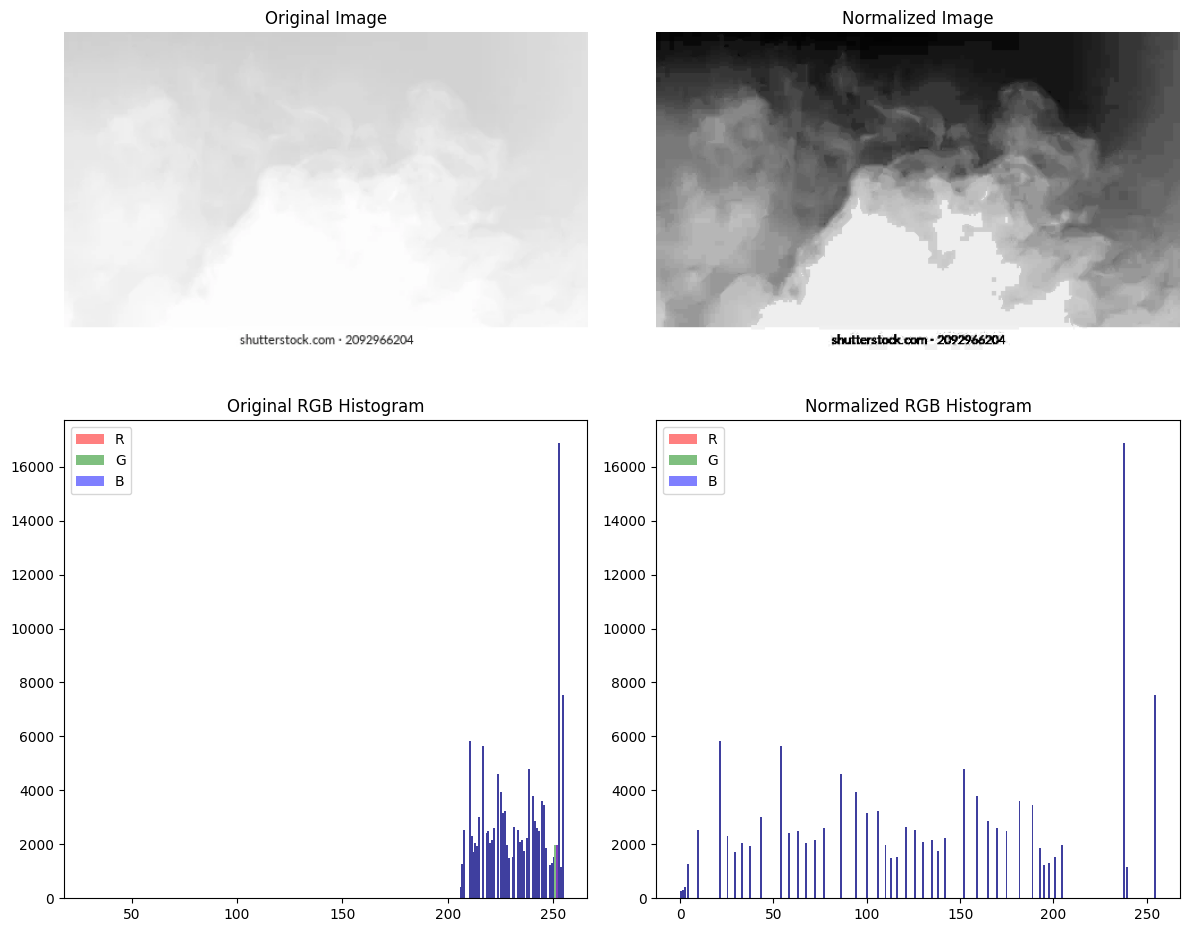

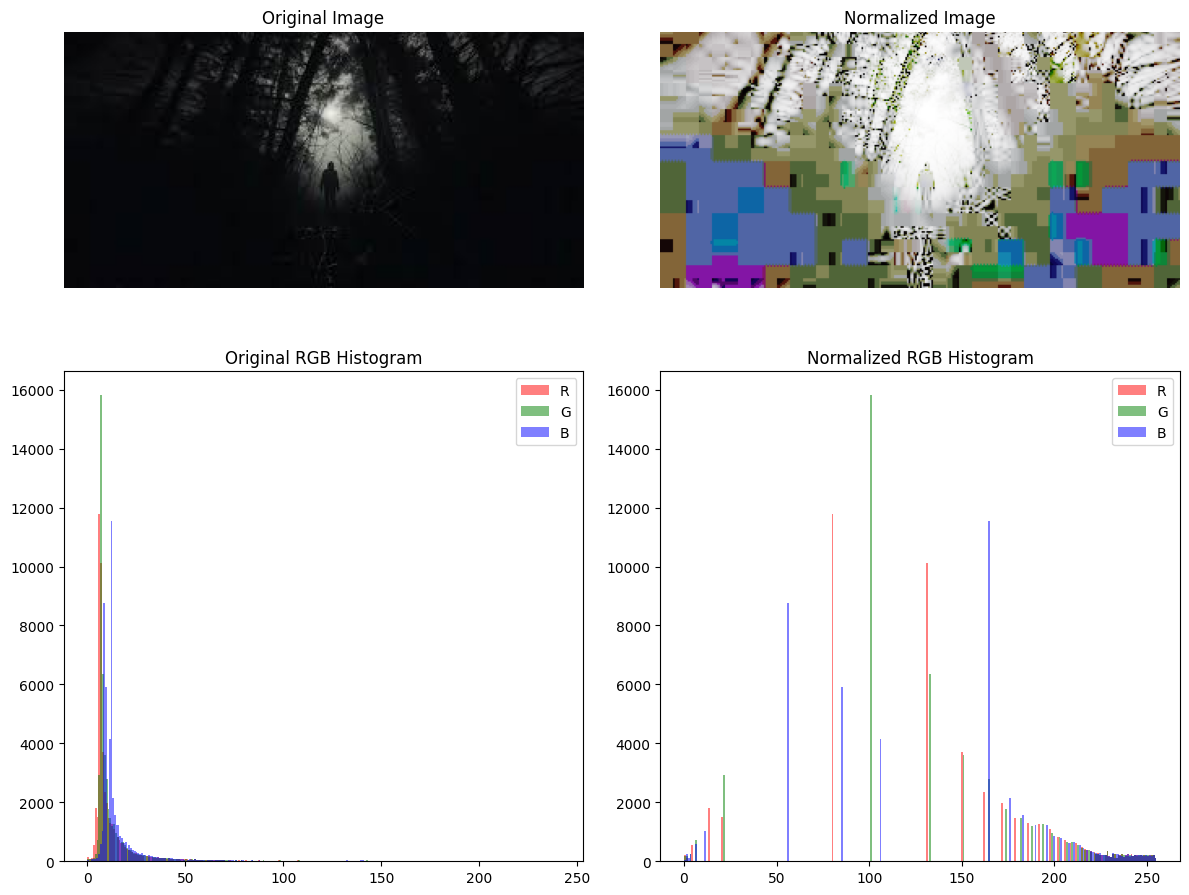

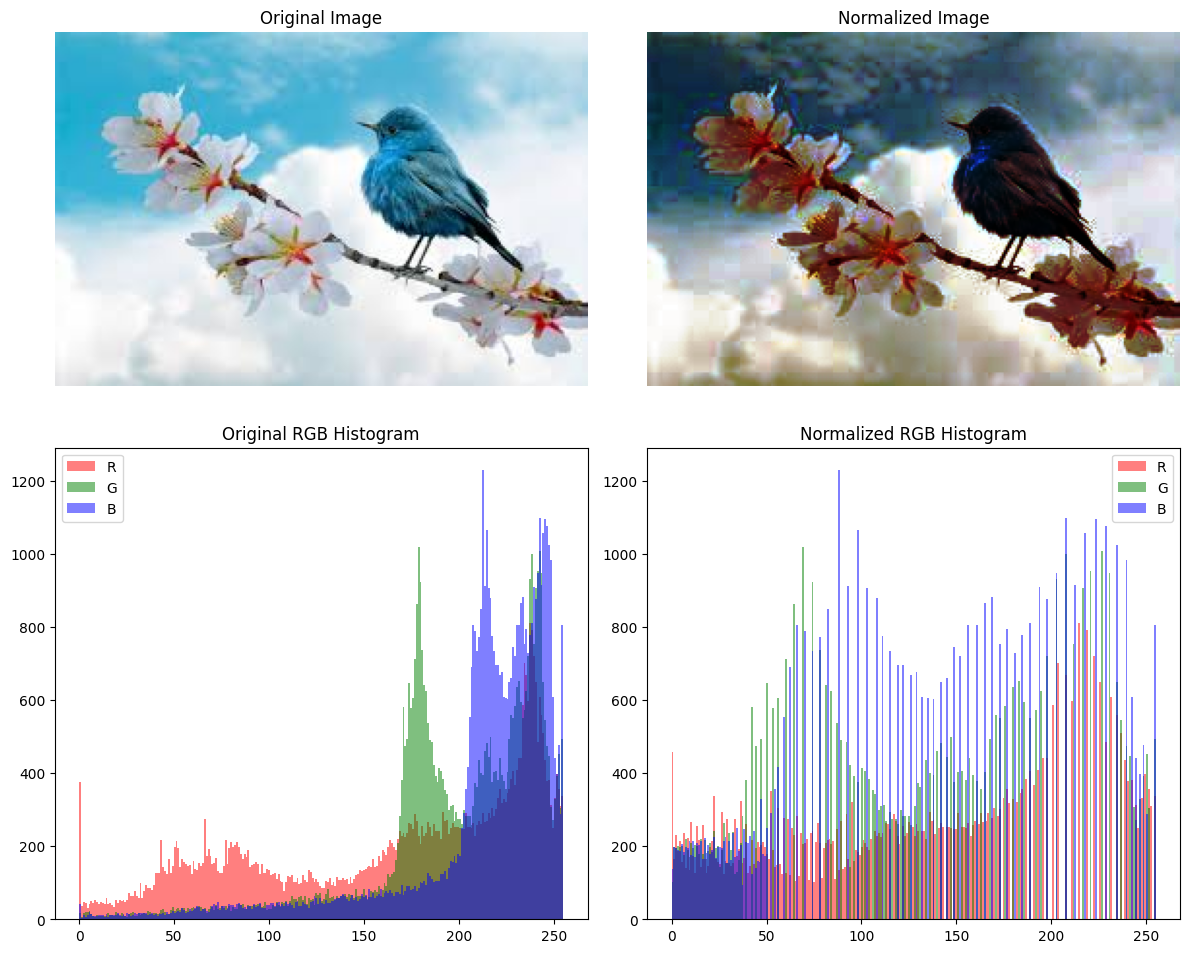

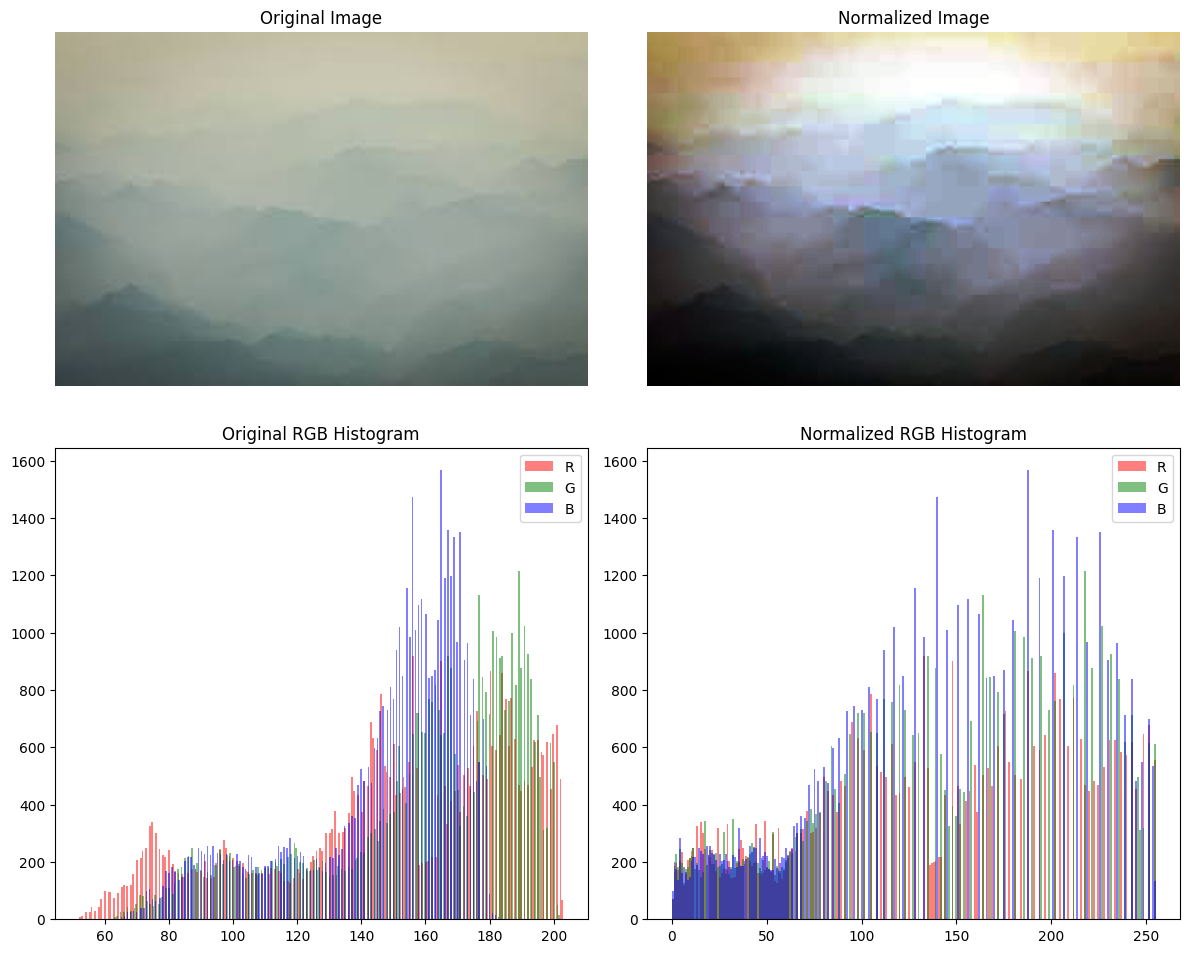

In [43]:
for i in imgs:
    display_color_histogram_equalization(i)
    


in this we can see that the bright image is left skeywed showing more bright pixels

and the dark image is right skewed showing more darker colored pixels

for the high contrast image we can see that there is a much giher divit in the bumps signifiaing two different colors/objects

and for the low contrast image we cannot see any bumps in the histogram

In [24]:
def display_images_and_histograms(path, color=False):

    if color:
        original = cv2.imread(path)
        original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
        equalized = cv2.cvtColor(cv2.equalizeHist(cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)), cv2.COLOR_GRAY2RGB)

    else:
        original = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        equalized = cv2.equalizeHist(original)

    fig, axes = plt.subplots(2, 2, figsize=(12, 6))

    if color:
    
        axes[0, 0].imshow(original)
        axes[0, 0].set_title('Original Image')
        axes[0, 0].axis('off')
        
        axes[0, 1].imshow(equalized)
        axes[0, 1].set_title('Equalized Image')
        axes[0, 1].axis('off')

    else:
    
        axes[0, 0].imshow(original, cmap='gray')
        axes[0, 0].set_title('Original Image')
        axes[0, 0].axis('off')
        
        axes[0, 1].imshow(equalized, cmap='gray')
        axes[0, 1].set_title('Equalized Image')
        axes[0, 1].axis('off')



    axes[1, 0].hist(original.ravel(), bins=256, range=[0,256])
    axes[1, 0].set_title('Histogram of Original Image')

    axes[1, 1].hist(equalized.ravel(), bins=256, range=[0,256])
    axes[1, 1].set_title('Histogram of Equalized Image')

    plt.tight_layout()
    plt.show()

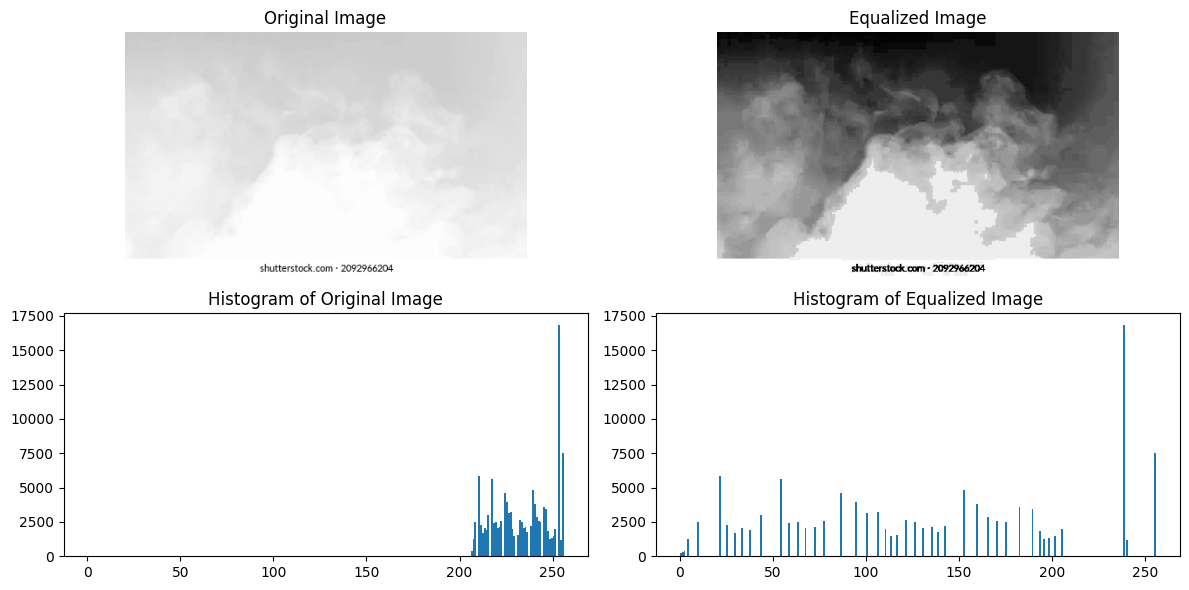

In [19]:
display_images_and_histograms('bright.webp')

we can see for the gray scale image the normalized histogram is more spread out compared to the original image which is skewed at the left side.
    
even in the image we can see more broader range of grays compared to the original which is just full of light colors

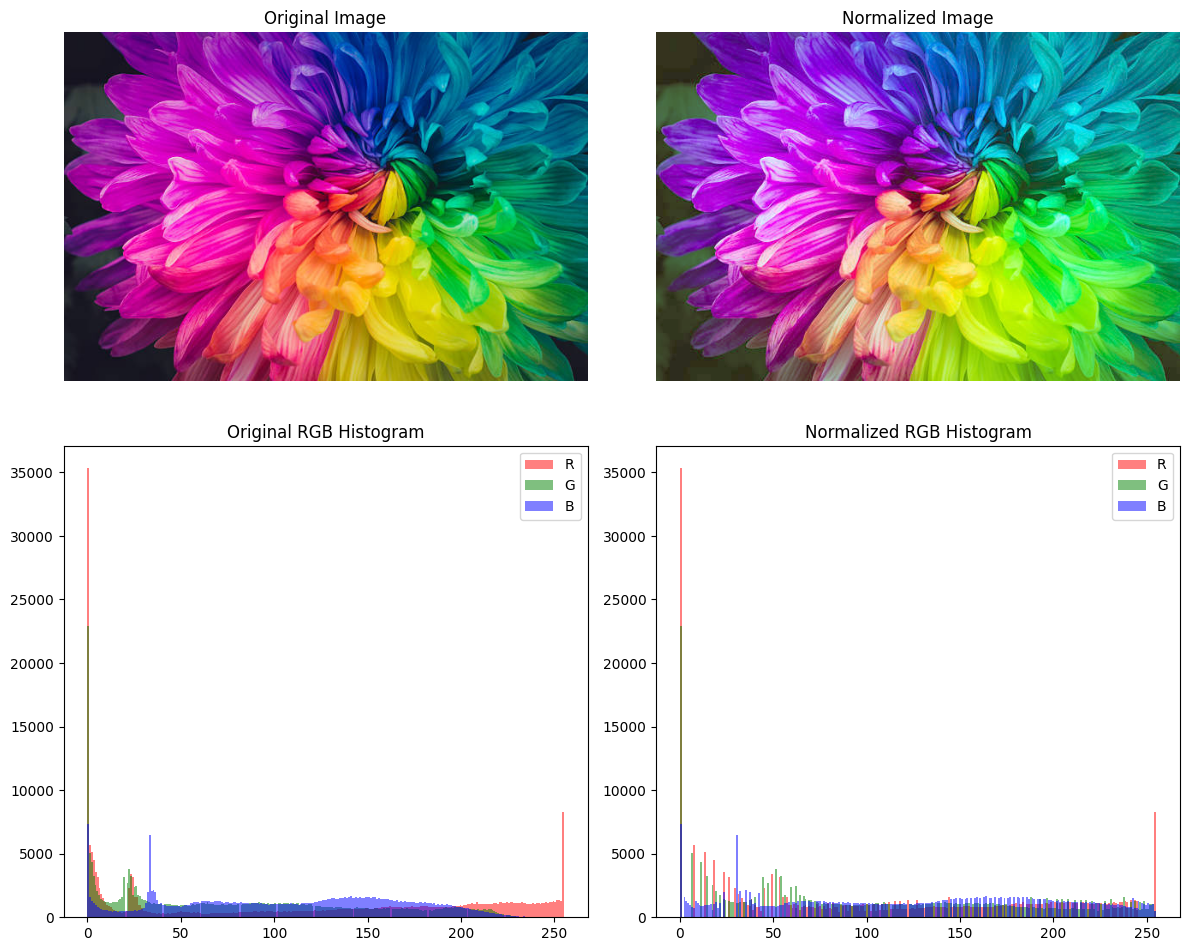

In [40]:
display_color_histogram_equalization('color.jpg')

we can see that the color image after normalization is losing its color and becoming grayish

and we can also see that the histogram of the is now more much higher of each pixels as after normalization the pixels are more evenly distributed